<a href="https://colab.research.google.com/github/KatharinaGardens/computational-linguistics.github.io/blob/Week-6/Week_6_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LELA32052 Computational Linguistics Week 6

This week we are going to a) take a look at multiclass classification and b)explore a few different neural network structures for handling sequences - sentences and sequences of letters. Our focus will be on classifying (applying a single label to a sequence) but we will also look briefly at generation.

### Multiclass classification problems

While logistic regression is great for binary classification tasks, many classification problems have more than two possible outcomes.  We can simulate such a situation as follows. I have just generalised sentiment analysis to a three class problem - negative, neutral and positive.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create simulated data
np.random.seed(10)
w1_center = (1, 3)
w2_center = (3, 1)
w3_center = (1, 1)
w4_center = (3, 3)

x=np.concatenate((np.random.normal(loc=w1_center,size=(20,2)),np.random.normal(loc=w2_center,size=(20,2)),np.random.normal(loc=w3_center,size=(10,2)),np.random.normal(loc=w4_center,size=(10,2))))
labs=np.repeat([0,1,2],[20,20,20],axis=0)
y=np.repeat(np.diag((1,1,1)),[20,20,20],axis=0)
x=x.T
y=y.T

(0.0, 5.0)

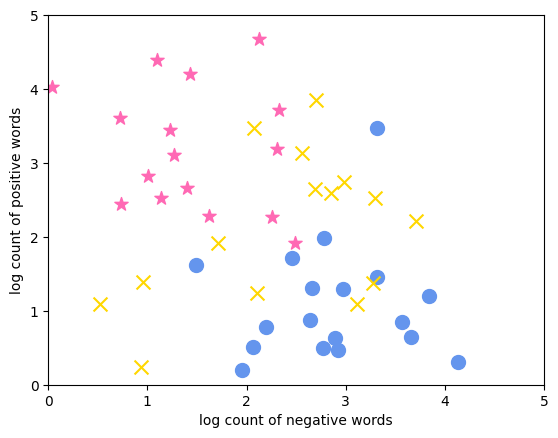

In [13]:
plt.scatter(x[0][labs==0], x[1][labs==0], marker='*', s=100, color = 'hotpink')
plt.scatter(x[0][labs==1], x[1][labs==1], marker='o', s=100, color = 'cornflowerblue')
plt.scatter(x[0][labs==2], x[1][labs==2], marker='x', s=100, color = 'gold')
plt.xlabel("log count of negative words")
plt.ylabel("log count of positive words")
plt.xlim((0,5))
plt.ylim((0,5))



### Softmax
In such circumstances we need to use multinomial logistic (aka softmax) regression.

In logistic regression we take the dot product between our feature vector for each data point and our weight vector. We then add the bias to give us a single z value which we feed through the sigmoid function. We can have only one z values because there are only two outcomes and the following relationship holds:
p(y=0|x) = 1-p(y=1|x)

In multinomial regression we instead have a z value for each of our possible outcomes. We can use these collectively to calculate probabilties for each of our possible outcomes. For example if we had three possible outcomes, 0, 1 or 2 then we would calculate their probabilities as follows:

$p(y=0|x) = \frac{exp(z_{0})}{\sum_{i,N} exp(z_i)}$ \\
$p(y=1|x) = \frac{exp(z_{1})}{\sum_{i,N} exp(z_i)}$ \\
$p(y=2|x) = \frac{exp(z_{2})}{\sum_{i,N} exp(z_i)}$ \\


Text(0, 0.5, 'loss')

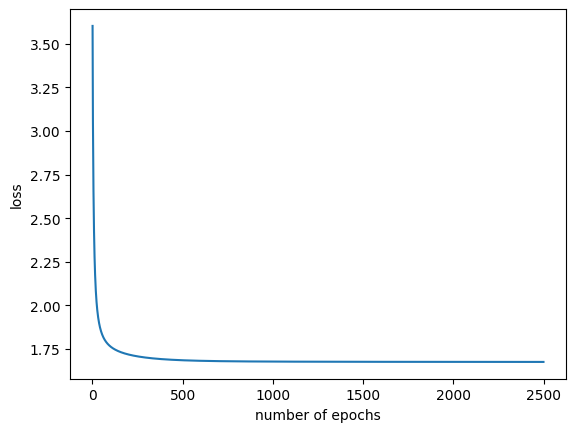

In [14]:
np.random.seed(10)
n_iters = 2500
num_features=2
num_classes=3
num_samples = len(y[0])
weights = np.random.rand(num_classes,num_features)
bias=np.zeros(num_classes)
lr=0.1
logistic_loss=[]
z=np.zeros((num_samples,num_classes))
q=np.zeros((num_samples,num_classes))

for i in range(n_iters):
    z[:,0]=x[0]*weights[0,0] + x[1]*weights[0,1] + bias[0]
    z[:,1]=x[0]*weights[1,0] + x[1]*weights[1,1] + bias[1]
    z[:,2]=x[0]*weights[2,0] + x[1]*weights[2,1] + bias[2]

    q[:,0] = np.exp(z[:,0])/np.exp(z).sum(axis=1)
    q[:,1] = np.exp(z[:,1])/np.exp(z).sum(axis=1)
    q[:,2] = np.exp(z[:,2])/np.exp(z).sum(axis=1)

    loss = sum(-(y[0]*np.log2(q[:,0])+(1-y[0])*np.log2(1-q[:,0])))/num_samples
    loss += sum(-(y[1]*np.log2(q[:,1])+(1-y[1])*np.log2(1-q[:,1])))/num_samples
    loss += sum(-(y[2]*np.log2(q[:,2])+(1-y[2])*np.log2(1-q[:,2])))/num_samples
    logistic_loss.append(loss)

    dw01 = sum(x[0]*(q[:,0]-y[0]))/num_samples # derivative with regards to weight 1 for outcome 0
    dw02 = sum(x[1]*(q[:,0]-y[0]))/num_samples # derivative with regards to weight 2 for outcome 0

    dw11 = sum(x[0]*(q[:,1]-y[1]))/num_samples # derivative with regards to weight 1 for outcome 1
    dw12 = sum(x[1]*(q[:,1]-y[1]))/num_samples # derivative with regards to weight 2 for outcome 1

    dw21 = sum(x[0]*(q[:,2]-y[2]))/num_samples # derivative with regards to weight 1 for outcome 2
    dw22 = sum(x[1]*(q[:,2]-y[2]))/num_samples # derivative with regards to weight 2 for outcome 2

    db0 = sum(q[:,0]-y[0])/num_samples # derivative with regards to bias for outcome 0
    db1 = sum(q[:,1]-y[1])/num_samples # derivative with regards to bias for outcome 1
    db2 = sum(q[:,2]-y[2])/num_samples # derivative with regards to bias for outcome 2

    weights[0,0] = weights[0,0] - dw01*lr
    weights[0,1] = weights[0,1] - dw02*lr

    weights[1,0] = weights[1,0] - dw11*lr
    weights[1,1] = weights[1,1] - dw12*lr

    weights[2,0] = weights[2,0] - dw21*lr
    weights[2,1] = weights[2,1] - dw22*lr

    bias[0] = bias[0] - db0*lr
    bias[1] = bias[1] - db1*lr
    bias[2] = bias[2] - db2*lr

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

### Comparing model predictions to real data

(0.0, 5.0)

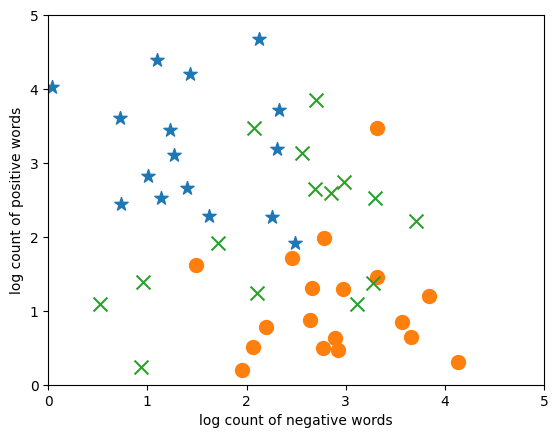

In [15]:
plt.scatter(x[0][labs==0], x[1][labs==0], marker='*', s=100)
plt.scatter(x[0][labs==1], x[1][labs==1], marker='o', s=100)
plt.scatter(x[0][labs==2], x[1][labs==2], marker='x', s=100)
plt.xlabel("log count of negative words")
plt.ylabel("log count of positive words")
plt.xlim((0,5))
plt.ylim((0,5))


(0.0, 5.0)

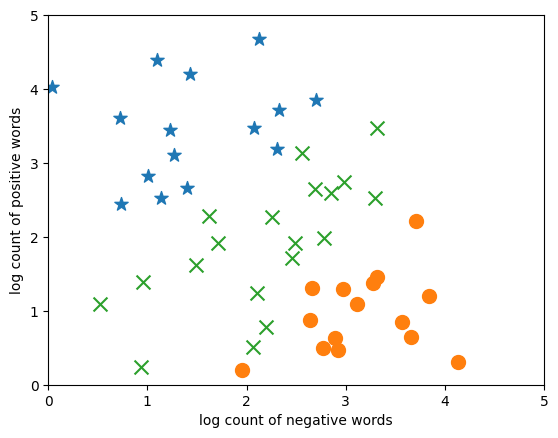

In [16]:
labs=np.array([np.argmax(i) for i in q])
plt.scatter(x[0][labs==0], x[1][labs==0], marker='*', s=100)
plt.scatter(x[0][labs==1], x[1][labs==1], marker='o', s=100)
plt.scatter(x[0][labs==2], x[1][labs==2], marker='x', s=100)
plt.xlabel("log count of negative words")
plt.ylabel("log count of positive words")
plt.xlim((0,5))
plt.ylim((0,5))

### Calculate accuracy for our multiclass classifier

In [17]:
np.mean([int(np.argmax(x) == np.argmax(y.T[i]))  for i,x in enumerate(q)])

0.7

# Multiclass classification with a real dataset

### Classifying surnames

The dataset we are going to work with today consists of 10,000 surnames, labelled with 18 different nationalities. Our first tasks will be to learn a classifier that can accurately assign a label to previously unseen surnames (note: the task is inherently very noisy). Later we will look at generating surnames. The dataset is split into 70% training data (from which we learn our network weights), 15% validation (which we use to evaluate and tune our network weights) and 15% test (which we use to quantitatively evaluate performance).

A critical difference between last week's task (assigning positive or negative sentiment) and this weeks is that instead of two output classes, we now have 18. The only change we need to make is to the function applied to the output layer. Whereas before we had a single node in the output layer where we added up the weights and applied the sigmoid function to generate a probability of a positive label (and then we just subtract this value from 1 to give the probability of a negative label), now we have as many nodes as we have outcome labels and we generate a probability for each by applying the "softmax" function.

In [18]:
#from google.colab import drive
#drive.mount("/content/gdrive")
#!mkdir /content/gdrive/My\ Drive/CL_Week_5_Materials/

In [19]:
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/surnames_with_splits.csv
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/mlp_tools.py
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/nn_tools_gen.py
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/generation_tools.py
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/rnn_tools.py
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/slp_model.pth
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/slp_vectorizer.json
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/mlp_model.pth
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/mlp_vectorizer.json
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/rnn_model.pth
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/rnn_vectorizer.json
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/gru_model.pth
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/gru_vectorizer.json
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/ugen_model.pth
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/ugen_vectorizer.json
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/cgen_model.pth
!wget https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/cgen_vectorizer.json

#!cp *py /content/gdrive/MyDrive/CL_Week_5_Materials/
#!cp *json /content/gdrive/MyDrive/CL_Week_5_Materials/
#!cp *csv /content/gdrive/MyDrive/CL_Week_5_Materials/
#!cp *pth /content/gdrive/MyDrive/CL_Week_5_Materials/


--2025-03-03 17:06:54--  https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/surnames_with_splits.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259531 (253K) [text/plain]
Saving to: ‘surnames_with_splits.csv’

surnames_with_split 100%[===================>] 253.45K  --.-KB/s    in 0.005s  

2025-03-03 17:06:54 (47.0 MB/s) - ‘surnames_with_splits.csv’ saved [259531/259531]

--2025-03-03 17:06:54--  https://raw.githubusercontent.com/cbannard/compling24/refs/heads/main/CL_Week_5_Materials/mlp_tools.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connect

### Importing modules

In [20]:
from argparse import Namespace
from collections import Counter
import json
import os
import re
import string

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook
from nn_tools_gen import *
from mlp_tools import *

import matplotlib.pyplot as plt
%matplotlib inline

### Multiclass Single layer neural network

First we will use a single layer neural network. This is identical to the network that we used last week for sentiment classification, except for the output layer (that now applies a softmax function rather than a sigmoid function, as we have moved from 2 to >2 output classes).

Instead of writing all the classification code we are going to use a tool called PyTorch. The point of including this is to examine the output - you do not need to understand the code.

In [21]:
class SurnameClassifier(nn.Module):
    """ A 1-layer Multilayer Perceptron for classifying surnames """
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Args:
            input_dim (int): the size of the input vectors
            output_dim (int): the output size of the second Linear layer
        """
        super(SurnameClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)

    def forward(self, x_in, apply_softmax=False):
        """The forward pass of the classifier

        Args:
            x_in (torch.Tensor): an input data tensor.
                x_in.shape should be (batch, input_dim)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, output_dim)
        """
        prediction_vector = self.fc1(x_in)

        if apply_softmax:
            prediction_vector = F.softmax(prediction_vector, dim=1)

        return prediction_vector

In [22]:
args = Namespace(
    # Data and path information
    surname_csv="surnames_with_splits.csv",
    vectorizer_file="slp_vectorizer.json",
    model_state_file="slp_model.pth",
    #save_dir="/content/gdrive/My Drive/CL_Week_5_Materials/",
    save_dir=".",
    # Model hyper parameters
    hidden_dim=300,
    # Training  hyper parameters
    seed=1337,
    num_epochs=100,
    early_stopping_criteria=5,
    learning_rate=0.001,
    batch_size=64,
    # Runtime options
    cuda=False,
    reload_from_files=False,
    expand_filepaths_to_save_dir=True,
)

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)

    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))

# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False

args.device = torch.device("cuda" if args.cuda else "cpu")

print("Using CUDA: {}".format(args.cuda))


# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Expanded filepaths: 
	./slp_vectorizer.json
	./slp_model.pth
Using CUDA: False


In [23]:
if args.reload_from_files:
    # training from a checkpoint
    print("Reloading!")
    dataset = SurnameDataset.load_dataset_and_load_vectorizer(args.surname_csv,
                                                              args.vectorizer_file)
else:
    # create dataset and vectorizer
    print("Creating fresh!")
    dataset = SurnameDataset.load_dataset_and_make_vectorizer(args.surname_csv)
    dataset.save_vectorizer(args.vectorizer_file)

vectorizer = dataset.get_vectorizer()
classifier = SurnameClassifier(input_dim=len(vectorizer.surname_vocab),
                               hidden_dim=args.hidden_dim,
                               output_dim=len(vectorizer.nationality_vocab))

Creating fresh!


In [24]:
train_state = make_train_state(args)
classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('test')
batch_generator = generate_batches(dataset,
                                   batch_size=args.batch_size,
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict['x_surname'])

    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_nationality'])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)

    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_nationality'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)
    print(str(batch_index) + " " + str(running_loss) + " " + str(running_acc))

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

0 2.326228618621826 35.9375
1 2.2158578634262085 38.28125
2 2.316247304280599 39.0625
3 2.343578040599823 39.453125
4 2.2987738609313966 40.625
5 2.2784401973088584 41.145833333333336
6 2.2585604190826416 40.401785714285715
7 2.224371686577797 41.2109375
8 2.2143973641925387 40.97222222222222
9 2.205352771282196 41.40625
10 2.2277945496819234 41.19318181818182
11 2.218890716632207 41.66666666666667
12 2.2136484017738924 41.94711538461539
13 2.1906863451004024 41.629464285714285
14 2.1994763851165766 41.666666666666664
15 2.1991986632347102 42.1875
16 2.190478030373068 42.279411764705884
17 2.2000237173504296 42.44791666666667
18 2.1985200957248083 42.02302631578948
19 2.2075490474700925 41.87500000000001
20 2.2069017432984848 42.55952380952382
21 2.191914319992065 43.18181818181819
22 2.1922634684521216 42.934782608695656
23 2.1997676789760585 42.903645833333336
24 2.207056770324707 42.8125


<ipython-input-24-045f797f8b9f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier.load_state_dict(torch.load(train_state['model_filename']))


In [25]:
print("Test loss: {};".format(train_state['test_loss']))
print("Test Accuracy: {}".format(train_state['test_acc']))

Test loss: 2.207056770324707;
Test Accuracy: 42.8125


In [32]:
new_surname = input("Enter a surname to classify: ")
classifier = classifier.to("cpu")
prediction = predict_nationality(new_surname, classifier, vectorizer)
print("{} -> {} (p={:0.2f})".format(new_surname,
                                    prediction['nationality'],
                                    prediction['probability']))

Enter a surname to classify: Brown
Brown -> English (p=0.16)


If you want to test a few at a time you can put them in a list like this:

In [30]:
# surname = input("Enter a surname: ")
classifier = classifier.to("cpu")
for surname in ['McMahan', 'Nakamoto', 'Wan', 'Cho']:
    print(predict_nationality(surname, classifier, vectorizer))

{'nationality': 'Irish', 'probability': 0.1498262882232666}
{'nationality': 'Japanese', 'probability': 0.3817743957042694}
{'nationality': 'Chinese', 'probability': 0.15522107481956482}
{'nationality': 'Korean', 'probability': 0.1300460398197174}


### MultiLayer Perceptron

Next we will use a multilayer perceptron. This is identical to the model above except that we add a hidden layer between the input and the output layers that combined the weighted input from the different first layers (input) nodes and learns a new set of weights to apply to the resulting combined values before submitting these new values to the output (softmax) function.

In [33]:
class SurnameClassifier(nn.Module):
    """ A 2-layer Multilayer Perceptron for classifying surnames """
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Args:
            input_dim (int): the size of the input vectors
            hidden_dim (int): the output size of the first Linear layer
            output_dim (int): the output size of the second Linear layer
        """
        super(SurnameClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x_in, apply_softmax=False):
        """The forward pass of the classifier

        Args:
            x_in (torch.Tensor): an input data tensor.
                x_in.shape should be (batch, input_dim)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, output_dim)
        """
        intermediate_vector = F.relu(self.fc1(x_in))
        prediction_vector = self.fc2(intermediate_vector)

        if apply_softmax:
            prediction_vector = F.softmax(prediction_vector, dim=1)

        return prediction_vector

In [34]:
args = Namespace(
    # Data and path information
    surname_csv="surnames_with_splits.csv",
    vectorizer_file="mlp_vectorizer.json",
    model_state_file="mlp_model.pth",
    #save_dir="/content/gdrive/My Drive/CL_Week_5_Materials/",
    save_dir=".",
    # Model hyper parameters
    hidden_dim=300,
    # Training  hyper parameters
    seed=1337,
    num_epochs=100,
    early_stopping_criteria=5,
    learning_rate=0.001,
    batch_size=64,
    # Runtime options
    cuda=False,
    reload_from_files=False,
    expand_filepaths_to_save_dir=True,
)

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)

    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))

# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False

args.device = torch.device("cuda" if args.cuda else "cpu")

print("Using CUDA: {}".format(args.cuda))


# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Expanded filepaths: 
	./mlp_vectorizer.json
	./mlp_model.pth
Using CUDA: False


In [35]:
if args.reload_from_files:
    # training from a checkpoint
    print("Reloading!")
    dataset = SurnameDataset.load_dataset_and_load_vectorizer(args.surname_csv,
                                                              args.vectorizer_file)
else:
    # create dataset and vectorizer
    print("Creating fresh!")
    dataset = SurnameDataset.load_dataset_and_make_vectorizer(args.surname_csv)
    dataset.save_vectorizer(args.vectorizer_file)

vectorizer = dataset.get_vectorizer()
classifier = SurnameClassifier(input_dim=len(vectorizer.surname_vocab),
                               hidden_dim=args.hidden_dim,
                               output_dim=len(vectorizer.nationality_vocab))

Creating fresh!


In [36]:
train_state = make_train_state(args)
classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('test')
batch_generator = generate_batches(dataset,
                                   batch_size=args.batch_size,
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict['x_surname'])

    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_nationality'])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)

    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_nationality'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)
    print(str(batch_index) + " " + str(running_loss) + " " + str(running_acc))

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

0 1.974481225013733 43.75
1 1.8126301765441895 42.1875
2 1.9404749075571697 42.1875
3 1.9277713894844055 42.578125
4 1.8902894973754882 42.1875
5 1.7462740739186604 44.53125
6 1.7442865371704102 44.19642857142857
7 1.7172853201627731 45.3125
8 1.7344663672977023 45.138888888888886
9 1.7754987716674804 44.6875
10 1.7710323550484397 44.60227272727273
11 1.788621336221695 44.010416666666664
12 1.734587495143597 44.71153846153846
13 1.714039955820356 44.08482142857143
14 1.715809416770935 43.958333333333336
15 1.7479792311787605 44.23828125
16 1.8029362944995655 43.474264705882355
17 1.8126101162698534 43.57638888888889
18 1.8156756852802478 43.66776315789474
19 1.8152189493179323 43.90625
20 1.830967494419643 44.345238095238095
21 1.8192235231399538 44.60227272727273
22 1.8338731164517612 44.90489130434783
23 1.8317103137572608 45.1171875
24 1.8400198984146119 45.3125


<ipython-input-36-045f797f8b9f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier.load_state_dict(torch.load(train_state['model_filename']))


In [37]:
print("Test loss: {};".format(train_state['test_loss']))
print("Test Accuracy: {}".format(train_state['test_acc']))

Test loss: 1.8400198984146119;
Test Accuracy: 45.3125


In [38]:
new_surname = input("Enter a surname to classify: ")
classifier = classifier.to("cpu")
prediction = predict_nationality(new_surname, classifier, vectorizer)
print("{} -> {} (p={:0.2f})".format(new_surname,
                                    prediction['nationality'],
                                    prediction['probability']))

Enter a surname to classify: Papp
Papp -> Czech (p=0.20)


If you want to test a few at a time you can put them in a list like this:

In [39]:
# surname = input("Enter a surname: ")
classifier = classifier.to("cpu")
for surname in ['McMahan', 'Nakamoto', 'Wan', 'Cho']:
    print(predict_nationality(surname, classifier, vectorizer))

{'nationality': 'Irish', 'probability': 0.40081486105918884}
{'nationality': 'Japanese', 'probability': 0.7906776070594788}
{'nationality': 'Chinese', 'probability': 0.7111243605613708}
{'nationality': 'Korean', 'probability': 0.7131038904190063}


In [40]:
!ls

cgen_model.pth	      mlp_model.pth	   rnn_model.pth	slp_vectorizer.json
cgen_vectorizer.json  mlp_tools.py	   rnn_tools.py		surnames_with_splits.csv
generation_tools.py   mlp_vectorizer.json  rnn_vectorizer.json	ugen_model.pth
gru_model.pth	      nn_tools_gen.py	   sample_data		ugen_vectorizer.json
gru_vectorizer.json   __pycache__	   slp_model.pth


### Recurrent Neural Network based classifier

Next we use a simple recurrent neural network to transform the sequence input before then passing the resulting representation to a multilayer perceptron (see lecture). This is called an Elman network after Jeff Elman, who first applied such a network to language.


In [41]:
from rnn_tools import *

In [42]:
class ElmanRNN(nn.Module):
    """ an Elman RNN built using the RNNCell """
    def __init__(self, input_size, hidden_size, batch_first=False):
        """
        Args:
            input_size (int): size of the input vectors
            hidden_size (int): size of the hidden state vectors
            bathc_first (bool): whether the 0th dimension is batch
        """
        super(ElmanRNN, self).__init__()

        self.rnn_cell = nn.RNNCell(input_size, hidden_size)

        self.batch_first = batch_first
        self.hidden_size = hidden_size

    def _initial_hidden(self, batch_size):
        return torch.zeros((batch_size, self.hidden_size))

    def forward(self, x_in, initial_hidden=None):
        """The forward pass of the ElmanRNN

        Args:
            x_in (torch.Tensor): an input data tensor.
                If self.batch_first: x_in.shape = (batch, seq_size, feat_size)
                Else: x_in.shape = (seq_size, batch, feat_size)
            initial_hidden (torch.Tensor): the initial hidden state for the RNN
        Returns:
            hiddens (torch.Tensor): The outputs of the RNN at each time step.
                If self.batch_first: hiddens.shape = (batch, seq_size, hidden_size)
                Else: hiddens.shape = (seq_size, batch, hidden_size)
        """
        if self.batch_first:
            batch_size, seq_size, feat_size = x_in.size()
            x_in = x_in.permute(1, 0, 2)
        else:
            seq_size, batch_size, feat_size = x_in.size()

        hiddens = []

        if initial_hidden is None:
            initial_hidden = self._initial_hidden(batch_size)
            initial_hidden = initial_hidden.to(x_in.device)

        hidden_t = initial_hidden

        for t in range(seq_size):
            hidden_t = self.rnn_cell(x_in[t], hidden_t)
            hiddens.append(hidden_t)

        hiddens = torch.stack(hiddens)

        if self.batch_first:
            hiddens = hiddens.permute(1, 0, 2)

        return hiddens



class SurnameClassifier(nn.Module):
    """ A Classifier with an RNN to extract features and an MLP to classify """
    def __init__(self, embedding_size, num_embeddings, num_classes,
                 rnn_hidden_size, batch_first=True, padding_idx=0):
        """
        Args:
            embedding_size (int): The size of the character embeddings
            num_embeddings (int): The number of characters to embed
            num_classes (int): The size of the prediction vector
                Note: the number of nationalities
            rnn_hidden_size (int): The size of the RNN's hidden state
            batch_first (bool): Informs whether the input tensors will
                have batch or the sequence on the 0th dimension
            padding_idx (int): The index for the tensor padding;
                see torch.nn.Embedding
        """
        super(SurnameClassifier, self).__init__()

        self.emb = nn.Embedding(num_embeddings=num_embeddings,
                                embedding_dim=embedding_size,
                                padding_idx=padding_idx)
        self.rnn = ElmanRNN(input_size=embedding_size,
                             hidden_size=rnn_hidden_size,
                             batch_first=batch_first)
        self.fc1 = nn.Linear(in_features=rnn_hidden_size,
                         out_features=rnn_hidden_size)
        self.fc2 = nn.Linear(in_features=rnn_hidden_size,
                          out_features=num_classes)

    def forward(self, x_in, x_lengths=None, apply_softmax=False):
        """The forward pass of the classifier

        Args:
            x_in (torch.Tensor): an input data tensor.
                x_in.shape should be (batch, input_dim)
            x_lengths (torch.Tensor): the lengths of each sequence in the batch.
                They are used to find the final vector of each sequence
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, output_dim)
        """
        x_embedded = self.emb(x_in)
        y_out = self.rnn(x_embedded)

        if x_lengths is not None:
            y_out = column_gather(y_out, x_lengths)
        else:
            y_out = y_out[:, -1, :]

        y_out = F.relu(self.fc1(F.dropout(y_out, 0.5)))
        y_out = self.fc2(F.dropout(y_out, 0.5))

        if apply_softmax:
            y_out = F.softmax(y_out, dim=1)

        return y_out

In [43]:
args = Namespace(
    # Data and path information
    surname_csv="surnames_with_splits.csv",
    vectorizer_file="rnn_vectorizer.json",
    model_state_file="rnn_model.pth",
    #save_dir="/content/gdrive/My Drive/CL_Week_5_Materials/",
    save_dir=".",
    # Model hyper parameter
    char_embedding_size=100,
    rnn_hidden_size=64,
    # Training hyper parameter
    num_epochs=100,
    learning_rate=1e-3,
    batch_size=64,
    seed=1337,
    early_stopping_criteria=5,
    # Runtime hyper parameter
    cuda=True,
    catch_keyboard_interrupt=True,
    reload_from_files=False,
    expand_filepaths_to_save_dir=True,
)

# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False

args.device = torch.device("cuda" if args.cuda else "cpu")

print("Using CUDA: {}".format(args.cuda))


if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Using CUDA: True


In [44]:
if args.reload_from_files and os.path.exists(args.vectorizer_file):
    # training from a checkpoint
    dataset = SurnameDataset.load_dataset_and_load_vectorizer(args.surname_csv,
                                                              args.vectorizer_file)
else:
    # create dataset and vectorizer
    dataset = SurnameDataset.load_dataset_and_make_vectorizer(args.surname_csv)
    dataset.save_vectorizer(args.vectorizer_file)

vectorizer = dataset.get_vectorizer()

classifier = SurnameClassifier(embedding_size=args.char_embedding_size,
                               num_embeddings=len(vectorizer.char_vocab),
                               num_classes=len(vectorizer.nationality_vocab),
                               rnn_hidden_size=args.rnn_hidden_size,
                               padding_idx=vectorizer.char_vocab.mask_index)

In [45]:
train_state = make_train_state(args)
classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('test')
batch_generator = generate_batches(dataset,
                                   batch_size=args.batch_size,
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict['x_data'],
                         x_lengths=batch_dict['x_length'])

    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_target'])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)

    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)
    print(str(batch_index) + " " + str(running_loss) + " " + str(running_acc))

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

<ipython-input-45-4124ae40934c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier.load_state_dict(torch.load(train_state['model_filename']))


0 2.143035650253296 39.0625
1 1.888762652873993 38.28125
2 1.9392621914545696 39.0625
3 1.9470037519931793 39.84375
4 1.8629941463470459 39.6875
5 1.8281096418698628 40.625
6 1.7701916694641113 41.07142857142857
7 1.7318523675203323 41.9921875
8 1.6921479172176785 41.84027777777778
9 1.7507294416427612 42.03125
10 1.757811513814059 43.18181818181818
11 1.7099346419175465 43.48958333333333
12 1.679400636599614 43.38942307692307
13 1.6902715819222585 43.191964285714285
14 1.7155992666880289 43.645833333333336
15 1.6971231251955032 43.45703125
16 1.6860423508812399 43.841911764705884
17 1.6939916345808241 43.489583333333336
18 1.7035537330727828 43.17434210526316
19 1.7012998640537262 43.125
20 1.7479482548577445 43.526785714285715
21 1.7777093919840725 43.60795454545455
22 1.7806581155113552 43.27445652173913
23 1.776674598455429 43.1640625
24 1.7595501947402954 43.75


In [46]:
print("Test loss: {};".format(train_state['test_loss']))
print("Test Accuracy: {}".format(train_state['test_acc']))

Test loss: 1.7595501947402954;
Test Accuracy: 43.75


In [47]:
new_surname = input("Enter a surname to classify: ")
classifier = classifier.to("cpu")
prediction = predict_nationality_rnn(new_surname, classifier, vectorizer)
print("{} -> {} (p={:0.2f})".format(new_surname,
                                    prediction['nationality'],
                                    prediction['probability']))

Enter a surname to classify: Papp
Papp -> German (p=0.34)


If you want to test a few at a time you can put them in a list like this:

In [48]:
# surname = input("Enter a surname: ")
classifier = classifier.to("cpu")
for surname in ['Lee', 'Kim', 'Britt', 'Hansen']:
    print(predict_nationality_rnn(surname, classifier, vectorizer))

{'nationality': 'Vietnamese', 'probability': 0.2007547914981842, 'surname': 'Lee'}
{'nationality': 'Korean', 'probability': 0.5973881483078003, 'surname': 'Kim'}
{'nationality': 'Scottish', 'probability': 0.4441013038158417, 'surname': 'Britt'}
{'nationality': 'Irish', 'probability': 0.23335354030132294, 'surname': 'Hansen'}


### Gated Recurrent Unit (GRU)-based classifier

We next take a similar approach but instead of a simple RNN we make use of a recurrent neural network with gating. As explained in the lecture this uses gates at each step (of the input, e.g. words or characters) in order to learn what information to pass along through the recurrent connections.

In [49]:
class GRU(nn.Module):
    """ a GRU network built using the GRU Cell """
    def __init__(self, input_size, hidden_size, batch_first=False):
        """
        Args:
            input_size (int): size of the input vectors
            hidden_size (int): size of the hidden state vectors
            bathc_first (bool): whether the 0th dimension is batch
        """
        super(GRU, self).__init__()

        self.rnn_cell = nn.GRUCell(input_size, hidden_size)

        self.batch_first = batch_first
        self.hidden_size = hidden_size

    def _initial_hidden(self, batch_size):
        return torch.zeros((batch_size, self.hidden_size))

    def forward(self, x_in, initial_hidden=None):
        """The forward pass of the GRU

        Args:
            x_in (torch.Tensor): an input data tensor.
                If self.batch_first: x_in.shape = (batch, seq_size, feat_size)
                Else: x_in.shape = (seq_size, batch, feat_size)
            initial_hidden (torch.Tensor): the initial hidden state for the RNN
        Returns:
            hiddens (torch.Tensor): The outputs of the RNN at each time step.
                If self.batch_first: hiddens.shape = (batch, seq_size, hidden_size)
                Else: hiddens.shape = (seq_size, batch, hidden_size)
        """
        if self.batch_first:
            batch_size, seq_size, feat_size = x_in.size()
            x_in = x_in.permute(1, 0, 2)
        else:
            seq_size, batch_size, feat_size = x_in.size()

        hiddens = []

        if initial_hidden is None:
            initial_hidden = self._initial_hidden(batch_size)
            initial_hidden = initial_hidden.to(x_in.device)

        hidden_t = initial_hidden

        for t in range(seq_size):
            hidden_t = self.rnn_cell(x_in[t], hidden_t)
            hiddens.append(hidden_t)

        hiddens = torch.stack(hiddens)

        if self.batch_first:
            hiddens = hiddens.permute(1, 0, 2)

        return hiddens



class SurnameClassifier(nn.Module):
    """ A Classifier with an RNN to extract features and an MLP to classify """
    def __init__(self, embedding_size, num_embeddings, num_classes,
                 rnn_hidden_size, batch_first=True, padding_idx=0):
        """
        Args:
            embedding_size (int): The size of the character embeddings
            num_embeddings (int): The number of characters to embed
            num_classes (int): The size of the prediction vector
                Note: the number of nationalities
            rnn_hidden_size (int): The size of the RNN's hidden state
            batch_first (bool): Informs whether the input tensors will
                have batch or the sequence on the 0th dimension
            padding_idx (int): The index for the tensor padding;
                see torch.nn.Embedding
        """
        super(SurnameClassifier, self).__init__()

        self.emb = nn.Embedding(num_embeddings=num_embeddings,
                                embedding_dim=embedding_size,
                                padding_idx=padding_idx)
        self.rnn = GRU(input_size=embedding_size,
                             hidden_size=rnn_hidden_size,
                             batch_first=batch_first)
        self.fc1 = nn.Linear(in_features=rnn_hidden_size,
                         out_features=rnn_hidden_size)
        self.fc2 = nn.Linear(in_features=rnn_hidden_size,
                          out_features=num_classes)

    def forward(self, x_in, x_lengths=None, apply_softmax=False):
        """The forward pass of the classifier

        Args:
            x_in (torch.Tensor): an input data tensor.
                x_in.shape should be (batch, input_dim)
            x_lengths (torch.Tensor): the lengths of each sequence in the batch.
                They are used to find the final vector of each sequence
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, output_dim)
        """
        x_embedded = self.emb(x_in)
        y_out = self.rnn(x_embedded)

        if x_lengths is not None:
            y_out = column_gather(y_out, x_lengths)
        else:
            y_out = y_out[:, -1, :]

        y_out = F.relu(self.fc1(F.dropout(y_out, 0.5)))
        y_out = self.fc2(F.dropout(y_out, 0.5))

        if apply_softmax:
            y_out = F.softmax(y_out, dim=1)

        return y_out

In [50]:
args = Namespace(
    # Data and path information
    surname_csv="surnames_with_splits.csv",
    vectorizer_file="gru_vectorizer.json",
    model_state_file="gru_model.pth",
    #save_dir="/content/gdrive/My Drive/CL_Week_5_Materials/",
    save_dir=".",
    # Model hyper parameter
    char_embedding_size=100,
    rnn_hidden_size=64,
    # Training hyper parameter
    num_epochs=100,
    learning_rate=1e-3,
    batch_size=64,
    seed=1337,
    early_stopping_criteria=5,
    # Runtime hyper parameter
    cuda=True,
    catch_keyboard_interrupt=True,
    reload_from_files=False,
    expand_filepaths_to_save_dir=True,
)

# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False

args.device = torch.device("cuda" if args.cuda else "cpu")

print("Using CUDA: {}".format(args.cuda))


if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Using CUDA: True


In [51]:
if args.reload_from_files and os.path.exists(args.vectorizer_file):
    # training from a checkpoint
    dataset = SurnameDataset.load_dataset_and_load_vectorizer(args.surname_csv,
                                                              args.vectorizer_file)
else:
    # create dataset and vectorizer
    dataset = SurnameDataset.load_dataset_and_make_vectorizer(args.surname_csv)
    dataset.save_vectorizer(args.vectorizer_file)

vectorizer = dataset.get_vectorizer()

classifier = SurnameClassifier(embedding_size=args.char_embedding_size,
                               num_embeddings=len(vectorizer.char_vocab),
                               num_classes=len(vectorizer.nationality_vocab),
                               rnn_hidden_size=args.rnn_hidden_size,
                               padding_idx=vectorizer.char_vocab.mask_index)

In [52]:
train_state = make_train_state(args)
classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('test')
batch_generator = generate_batches(dataset,
                                   batch_size=args.batch_size,
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict['x_data'],
                         x_lengths=batch_dict['x_length'])

    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_target'])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)

    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)
    print(str(batch_index) + " " + str(running_loss) + " " + str(running_acc))

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

<ipython-input-52-4124ae40934c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier.load_state_dict(torch.load(train_state['model_filename']))


0 1.3395916223526 53.125
1 1.5747750997543335 50.78125
2 1.4763903220494587 51.5625
3 1.72610405087471 50.0
4 1.6914704084396361 50.625
5 1.6816863616307576 48.4375
6 1.756134271621704 47.544642857142854
7 1.6988477259874344 47.8515625
8 1.6596817837821112 48.09027777777778
9 1.7023072600364684 47.34375
10 1.7181904315948484 46.73295454545455
11 1.7128815750281015 47.005208333333336
12 1.680969082392179 46.51442307692308
13 1.67059702532632 46.875
14 1.6753909667332967 46.770833333333336
15 1.688782349228859 47.265625
16 1.6794898369733025 47.4264705882353
17 1.7322889566421509 47.22222222222223
18 1.703621318465785 47.28618421052632
19 1.6776250064373015 47.50000000000001
20 1.7232159830275036 47.61904761904763
21 1.7137401266531511 47.301136363636374
22 1.6910144868104355 47.758152173913054
23 1.705683747927348 47.85156250000001
24 1.6942595577239992 47.62500000000001


In [53]:
print("Test loss: {};".format(train_state['test_loss']))
print("Test Accuracy: {}".format(train_state['test_acc']))

Test loss: 1.6942595577239992;
Test Accuracy: 47.62500000000001


In [54]:
new_surname = input("Enter a surname to classify: ")
classifier = classifier.to("cpu")
prediction = predict_nationality_rnn(new_surname, classifier, vectorizer)
print("{} -> {} (p={:0.2f})".format(new_surname,
                                    prediction['nationality'],
                                    prediction['probability']))

Enter a surname to classify: Papp
Papp -> Dutch (p=0.38)


### Unconditioned Generation with Recurrent Neural Networks

This actually works very similarly in that it randomly picks each element of the sequence we are generating based on its probability in context. The difference is that the probabilities are based on the softmax output layer in a neural network rather than bigrams.

We are going to randomly generate surnames.

In [55]:
from generation_tools import *

In [56]:
class SurnameGenerationModel(nn.Module):
    def __init__(self, char_embedding_size, char_vocab_size, rnn_hidden_size,
                 batch_first=True, padding_idx=0, dropout_p=0.5):
        """
        Args:
            char_embedding_size (int): The size of the character embeddings
            char_vocab_size (int): The number of characters to embed
            rnn_hidden_size (int): The size of the RNN's hidden state
            batch_first (bool): Informs whether the input tensors will
                have batch or the sequence on the 0th dimension
            padding_idx (int): The index for the tensor padding;
                see torch.nn.Embedding
            dropout_p (float): the probability of zeroing activations using
                the dropout method.  higher means more likely to zero.
        """
        super(SurnameGenerationModel, self).__init__()

        self.char_emb = nn.Embedding(num_embeddings=char_vocab_size,
                                     embedding_dim=char_embedding_size,
                                     padding_idx=padding_idx)

        self.rnn = nn.GRU(input_size=char_embedding_size,
                          hidden_size=rnn_hidden_size,
                          batch_first=batch_first)

        self.fc = nn.Linear(in_features=rnn_hidden_size,
                            out_features=char_vocab_size)

        self._dropout_p = dropout_p

    def forward(self, x_in, apply_softmax=False):
        """The forward pass of the model

        Args:
            x_in (torch.Tensor): an input data tensor.
                x_in.shape should be (batch, input_dim)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, char_vocab_size)
        """
        x_embedded = self.char_emb(x_in)

        y_out, _ = self.rnn(x_embedded)

        batch_size, seq_size, feat_size = y_out.shape
        y_out = y_out.contiguous().view(batch_size * seq_size, feat_size)

        y_out = self.fc(F.dropout(y_out, p=self._dropout_p))

        if apply_softmax:
            y_out = F.softmax(y_out, dim=1)

        new_feat_size = y_out.shape[-1]
        y_out = y_out.view(batch_size, seq_size, new_feat_size)

        return y_out

In [57]:
def sample_from_model(model, vectorizer, num_samples=1, sample_size=20,
                      temperature=1.0):
    """Sample a sequence of indices from the model

    Args:
        model (SurnameGenerationModel): the trained model
        vectorizer (SurnameVectorizer): the corresponding vectorizer
        num_samples (int): the number of samples
        sample_size (int): the max length of the samples
        temperature (float): accentuates or flattens
            the distribution.
            0.0 < temperature < 1.0 will make it peakier.
            temperature > 1.0 will make it more uniform
    Returns:
        indices (torch.Tensor): the matrix of indices;
        shape = (num_samples, sample_size)
    """
    begin_seq_index = [vectorizer.char_vocab.begin_seq_index
                       for _ in range(num_samples)]
    begin_seq_index = torch.tensor(begin_seq_index,
                                   dtype=torch.int64).unsqueeze(dim=1)
    indices = [begin_seq_index]
    h_t = None

    for time_step in range(sample_size):
        x_t = indices[time_step]
        x_emb_t = model.char_emb(x_t)
        rnn_out_t, h_t = model.rnn(x_emb_t, h_t)
        prediction_vector = model.fc(rnn_out_t.squeeze(dim=1))
        probability_vector = F.softmax(prediction_vector / temperature, dim=1)
        indices.append(torch.multinomial(probability_vector, num_samples=1))
    indices = torch.stack(indices).squeeze().permute(1, 0)
    return indices

def decode_samples(sampled_indices, vectorizer):
    """Transform indices into the string form of a surname

    Args:
        sampled_indices (torch.Tensor): the inidces from `sample_from_model`
        vectorizer (SurnameVectorizer): the corresponding vectorizer
    """
    decoded_surnames = []
    vocab = vectorizer.char_vocab

    for sample_index in range(sampled_indices.shape[0]):
        surname = ""
        for time_step in range(sampled_indices.shape[1]):
            sample_item = sampled_indices[sample_index, time_step].item()
            if sample_item == vocab.begin_seq_index:
                continue
            elif sample_item == vocab.end_seq_index:
                break
            else:
                surname += vocab.lookup_index(sample_item)
        decoded_surnames.append(surname)
    return decoded_surnames

In [58]:
args = Namespace(
    # Data and Path information
    surname_csv="surnames_with_splits.csv",
    vectorizer_file="ugen_vectorizer.json",
    model_state_file="ugen_model.pth",
    #save_dir="/content/gdrive/My Drive/CL_Week_5_Materials/",
    save_dir=".",
    # Model hyper parameters
    char_embedding_size=32,
    rnn_hidden_size=32,
    # Training hyper parameters
    seed=1337,
    learning_rate=0.001,
    batch_size=128,
    num_epochs=100,
    early_stopping_criteria=5,
    # Runtime options
    catch_keyboard_interrupt=True,
    cuda=True,
    expand_filepaths_to_save_dir=True,
    reload_from_files=False,
)

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)

    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))


# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False

args.device = torch.device("cuda" if args.cuda else "cpu")

print("Using CUDA: {}".format(args.cuda))

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Expanded filepaths: 
	./ugen_vectorizer.json
	./ugen_model.pth
Using CUDA: True


In [59]:


if args.reload_from_files:
    # training from a checkpoint
    dataset = SurnameDataset.load_dataset_and_load_vectorizer(args.surname_csv,
                                                              args.vectorizer_file)
else:
    # create dataset and vectorizer
    dataset = SurnameDataset.load_dataset_and_make_vectorizer(args.surname_csv)
    dataset.save_vectorizer(args.vectorizer_file)

vectorizer = dataset.get_vectorizer()

model = SurnameGenerationModel(char_embedding_size=args.char_embedding_size,
                               char_vocab_size=len(vectorizer.char_vocab),
                               rnn_hidden_size=args.rnn_hidden_size,
                               padding_idx=vectorizer.char_vocab.mask_index)

train_state = make_train_state(args)

model.load_state_dict(torch.load(train_state['model_filename']))

model = model.to(args.device)

<ipython-input-59-94f8ca779a87>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(train_state['model_filename']))


In [60]:
# number of names to generate
num_names = 10
model = model.cpu()
# Generate nationality hidden state
sampled_surnames = decode_samples(
    sample_from_model(model, vectorizer, num_samples=num_names),
    vectorizer)
# Show results
print ("-"*15)
for i in range(num_names):
    print (sampled_surnames[i])

---------------
Pyinimy
Greo
Slorchovek
Oalnon
Dyzysamifki
Iil
Alenro
Vladoe
Hhandavkole
Yimassrß


### Conditioned Generation

We now repeat this, but we condition the output of the network on something that isn't in the sequence - a target nationality for the surname

In [61]:
class SurnameGenerationModel(nn.Module):
    def __init__(self, char_embedding_size, char_vocab_size, num_nationalities,
                 rnn_hidden_size, batch_first=True, padding_idx=0, dropout_p=0.5):
        """
        Args:
            char_embedding_size (int): The size of the character embeddings
            char_vocab_size (int): The number of characters to embed
            num_nationalities (int): The size of the prediction vector
            rnn_hidden_size (int): The size of the RNN's hidden state
            batch_first (bool): Informs whether the input tensors will
                have batch or the sequence on the 0th dimension
            padding_idx (int): The index for the tensor padding;
                see torch.nn.Embedding
            dropout_p (float): the probability of zeroing activations using
                the dropout method.  higher means more likely to zero.
        """
        super(SurnameGenerationModel, self).__init__()

        self.char_emb = nn.Embedding(num_embeddings=char_vocab_size,
                                     embedding_dim=char_embedding_size,
                                     padding_idx=padding_idx)

        self.nation_emb = nn.Embedding(num_embeddings=num_nationalities,
                                       embedding_dim=rnn_hidden_size)

        self.rnn = nn.GRU(input_size=char_embedding_size,
                          hidden_size=rnn_hidden_size,
                          batch_first=batch_first)

        self.fc = nn.Linear(in_features=rnn_hidden_size,
                            out_features=char_vocab_size)

        self._dropout_p = dropout_p

    def forward(self, x_in, nationality_index, apply_softmax=False):
        """The forward pass of the model

        Args:
            x_in (torch.Tensor): an input data tensor.
                x_in.shape should be (batch, max_seq_size)
            nationality_index (torch.Tensor): The index of the nationality for each data point
                Used to initialize the hidden state of the RNN
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, char_vocab_size)
        """
        x_embedded = self.char_emb(x_in)

        # hidden_size: (num_layers * num_directions, batch_size, rnn_hidden_size)
        nationality_embedded = self.nation_emb(nationality_index).unsqueeze(0)

        y_out, _ = self.rnn(x_embedded, nationality_embedded)

        batch_size, seq_size, feat_size = y_out.shape
        y_out = y_out.contiguous().view(batch_size * seq_size, feat_size)

        y_out = self.fc(F.dropout(y_out, p=self._dropout_p))

        if apply_softmax:
            y_out = F.softmax(y_out, dim=1)

        new_feat_size = y_out.shape[-1]
        y_out = y_out.view(batch_size, seq_size, new_feat_size)

        return y_out

In [62]:
def sample_from_model(model, vectorizer, nationalities, sample_size=20,
                      temperature=1.0):
    """Sample a sequence of indices from the model

    Args:
        model (SurnameGenerationModel): the trained model
        vectorizer (SurnameVectorizer): the corresponding vectorizer
        nationalities (list): a list of integers representing nationalities
        sample_size (int): the max length of the samples
        temperature (float): accentuates or flattens
            the distribution.
            0.0 < temperature < 1.0 will make it peakier.
            temperature > 1.0 will make it more uniform
    Returns:
        indices (torch.Tensor): the matrix of indices;
        shape = (num_samples, sample_size)
    """
    num_samples = len(nationalities)
    begin_seq_index = [vectorizer.char_vocab.begin_seq_index
                       for _ in range(num_samples)]
    begin_seq_index = torch.tensor(begin_seq_index,
                                   dtype=torch.int64).unsqueeze(dim=1)
    indices = [begin_seq_index]
    nationality_indices = torch.tensor(nationalities, dtype=torch.int64).unsqueeze(dim=0)
    h_t = model.nation_emb(nationality_indices)

    for time_step in range(sample_size):
        x_t = indices[time_step]
        x_emb_t = model.char_emb(x_t)
        rnn_out_t, h_t = model.rnn(x_emb_t, h_t)
        prediction_vector = model.fc(rnn_out_t.squeeze(dim=1))
        probability_vector = F.softmax(prediction_vector / temperature, dim=1)
        indices.append(torch.multinomial(probability_vector, num_samples=1))
    indices = torch.stack(indices).squeeze().permute(1, 0)
    return indices

def decode_samples(sampled_indices, vectorizer):
    """Transform indices into the string form of a surname

    Args:
        sampled_indices (torch.Tensor): the inidces from `sample_from_model`
        vectorizer (SurnameVectorizer): the corresponding vectorizer
    """
    decoded_surnames = []
    vocab = vectorizer.char_vocab

    for sample_index in range(sampled_indices.shape[0]):
        surname = ""
        for time_step in range(sampled_indices.shape[1]):
            sample_item = sampled_indices[sample_index, time_step].item()
            if sample_item == vocab.begin_seq_index:
                continue
            elif sample_item == vocab.end_seq_index:
                break
            else:
                surname += vocab.lookup_index(sample_item)
        decoded_surnames.append(surname)
    return decoded_surnames

In [63]:
args = Namespace(
    # Data and Path information
    surname_csv="surnames_with_splits.csv",
    vectorizer_file="cgen_vectorizer.json",
    model_state_file="cgen_model.pth",
    #save_dir="/content/gdrive/My Drive/CL_Week_5_Materials/",
    save_dir=".",
    # Model hyper parameters
    char_embedding_size=32,
    rnn_hidden_size=32,
    # Training hyper parameters
    seed=1337,
    learning_rate=0.001,
    batch_size=128,
    num_epochs=100,
    early_stopping_criteria=5,
    # Runtime options
    catch_keyboard_interrupt=True,
    cuda=True,
    expand_filepaths_to_save_dir=True,
    reload_from_files=False,
)

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)

    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))

# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False

args.device = torch.device("cuda" if args.cuda else "cpu")

print("Using CUDA: {}".format(args.cuda))

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Expanded filepaths: 
	./cgen_vectorizer.json
	./cgen_model.pth
Using CUDA: True


In [64]:
if args.reload_from_files:
    # training from a checkpoint
    dataset = SurnameDataset.load_dataset_and_load_vectorizer(args.surname_csv,
                                                              args.vectorizer_file)
else:
    # create dataset and vectorizer
    dataset = SurnameDataset.load_dataset_and_make_vectorizer(args.surname_csv)
    dataset.save_vectorizer(args.vectorizer_file)

vectorizer = dataset.get_vectorizer()

model = SurnameGenerationModel(char_embedding_size=args.char_embedding_size,
                               char_vocab_size=len(vectorizer.char_vocab),
                               num_nationalities=len(vectorizer.nationality_vocab),
                               rnn_hidden_size=args.rnn_hidden_size,
                               padding_idx=vectorizer.char_vocab.mask_index,
                               dropout_p=0.5)

train_state = make_train_state(args)

model.load_state_dict(torch.load(train_state['model_filename']))

model = model.to(args.device)

<ipython-input-64-2382c395a1d8>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(train_state['model_filename']))


In [65]:
model = model.cpu()
for index in range(len(vectorizer.nationality_vocab)):
    nationality = vectorizer.nationality_vocab.lookup_index(index)
    print("Sampled for {}: ".format(nationality))
    sampled_indices = sample_from_model(model, vectorizer,
                                        nationalities=[index] * 3,
                                        temperature=0.7)
    for sampled_surname in decode_samples(sampled_indices, vectorizer):
        print("-  " + sampled_surname)

Sampled for Arabic: 
-  Kadan
-  Shati
-  Bahat
Sampled for Chinese: 
-  Ars
-  Doas
-  May
Sampled for Czech: 
-  Jottore
-  Hatta
-  Kucham
Sampled for Dutch: 
-  Rernref
-  Kuroens
-  Miewe
Sampled for English: 
-  Gorloen
-  Aatkev
-  Javil
Sampled for French: 
-  Bolstan
-  Cerrena
-  Reera
Sampled for German: 
-  Pnanter
-  Kertk
-  Gerschoen
Sampled for Greek: 
-  Radmobucke
-  Lalopari
-  Keneshora
Sampled for Irish: 
-  Kigns
-  Adian
-  O'Sebanon
Sampled for Italian: 
-  Archiie
-  Actasoer
-  Amidi
Sampled for Japanese: 
-  Sarie
-  Magi
-  Natowames
Sampled for Korean: 
-  Gande
-  Pak
-  Se
Sampled for Polish: 
-  Pafsortov
-  Fujusko
-  Rikanav
Sampled for Portuguese: 
-  Tantoy
-  Marine
-  Bermale
Sampled for Russian: 
-  Abivovan
-  Manyanki
-  Puchans
Sampled for Scottish: 
-  Ardir
-  Amsentchon
-  Escher
Sampled for Spanish: 
-  Feoloun
-  Aloen
-  Adrak
Sampled for Vietnamese: 
-  Mar
-  Va
-  Choz
